In [1]:
import numpy as np
import matplotlib.pyplot as pl

# Task A

In [2]:
def func(z):
    m = np.tan(np.pi/3)
    R = 30
    x = np.sqrt(2*z*R-z**2)-z/m+R/m
    return x

In [3]:
def mybisection(a,b,eps):
    # repeat the split of teh interval until the bracketing intervla becomes smaller than the accuracy
    while abs(a-b)>eps:
        # calculate the mid point
        xm = (a + b) / 2
        # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = func(a) * func(xm)
        if ff < 0: 
            # the solution lies in the left interval
            # set the upper bracket as xm
            b = xm
        else:
            # the solution lies in the right interval
            # set the lower bracket as xm
            a = xm
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

In [4]:
m = np.tan(np.pi/3)
R = 30
z = mybisection(0,2*R,0.001)
x = z/m-R/m
print(x,z)

# check against the geometrical solution
print(R*np.cos(np.pi/3),R*np.sin(np.pi/3)+R)

14.99977776848933 55.980377197265625
15.000000000000004 55.98076211353316


# Task B 

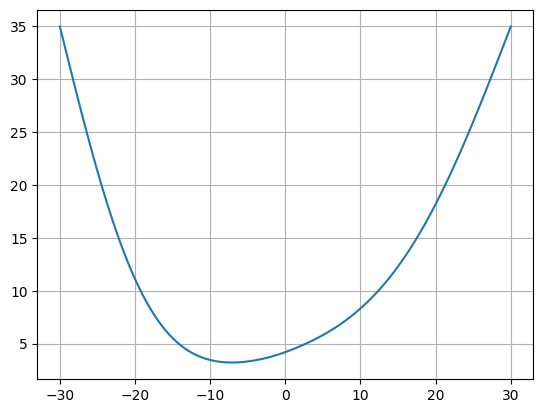

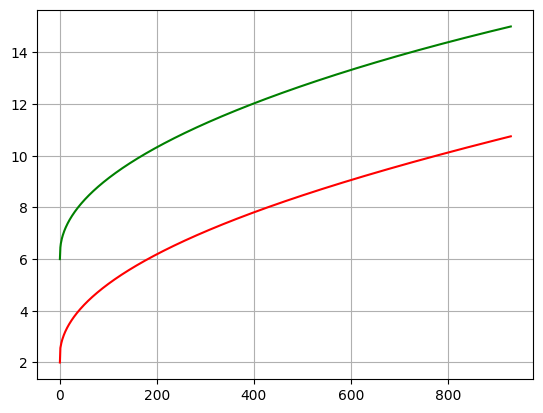

Ice cream melted after minutes:
15.5
Courant:
0.344 0.18


In [16]:
# spatial domain (in mm)
R = 30
dx = 0.5 # spatial increment
# greate the spatial grid points
x = np.arange(-R,R+dx,dx)
Nx = len(x)

# temporal domain
tend = 3600
dt = 1 # temporal increment
# create the temporal grid points
t = np.arange(0,tend+dt,dt)
Nt = len(t)

# create the solution matrix
T = np.ndarray((Nt,Nx))

# set the physics
# boundary conditions (fixed temperature at boundaries)
Ta = 35
Tb = 35
# set the initial T for watermelon
T[0,:int(Nx/2)] = 2
# set the initial T for pistachio
T[0,int(Nx/2):] = 6

# set the thermal diffusivity
alpha = np.ndarray(len(x))
# set the diffusivity T for watermelon
alpha[:int(Nx/2)] = 4.5e-2
# set the diffusivity for pistachio
alpha[int(Nx/2):] = 8.6e-2
# ================================================

averagep = np.average(T[0,int(Nx/2):])
averagew = np.average(T[0,:int(Nx/2)])
avp = [averagep]
avw = [averagew]
Tmelt = 15

c = alpha * dt / dx**2

# compute the solution incrementally at subsequent time steps
k = 1
while averagep < Tmelt:
    # compute at time step p, i.e. t = k * dt
    # do it for every node in the spatial grid
    # start with the boundaries
    T[k,0] = Ta
    T[k,-1] = Tb
    # do the interior nodes
    for i in range(1,Nx-1):
        # apply the discretised equation
        T[k,i] = c[i] * ( T[k-1,i+1] + T[k-1,i-1] ) + (1 - 2*c[i]) * T[k-1,i]
    averagep = np.average( T[k,int(Nx/2):])
    averagew = np.average( T[k,:int(Nx/2)])
    avp += [averagep]
    avw += [averagew]
    k += 1


pl.plot(x,T[k-1,:])
pl.grid()
pl.show()


pl.plot(t[:k],avp,c='Green')
pl.plot(t[:k],avw,c='Red')
pl.grid()
pl.show()

print('Ice cream melted after minutes:')
print((k-1)*dt/60)

print('Courant:')
print(c[-1],c[0])



# Task C

In [6]:
# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

In [7]:
def LagInterp(xn,yn,x):
    N = len(xn)
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    y = np.ndarray(len(x))
    # interpolate for all the values of x in the interpolating range
    for i in range(len(x)):
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,x[i])
        # add the curren value of yp to the list of y
        y[i] = yp
    return y

960


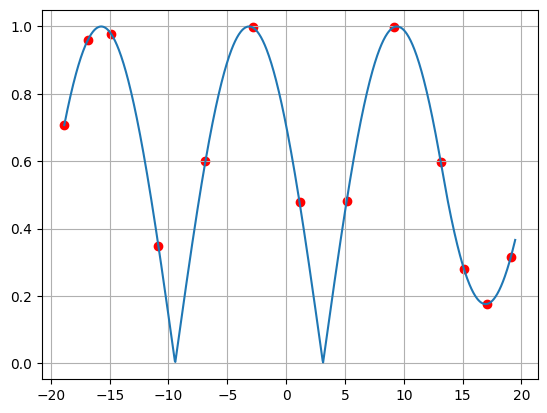

In [8]:
# preliminary workout for Task B to generate data sets (not part of the solutions)
dx = 0.01
xn1 = np.arange(np.pi/4,2.8*np.pi,dx)
yn1 = np.abs(np.sin(xn1))
xn2 = np.arange(2.8*np.pi,3.3*np.pi,dx)
yn2 = np.sin(xn2+0.4*np.pi) + ( np.abs(np.sin(2.8*np.pi))+np.abs(np.sin(3.2*np.pi)) )

xni = np.concatenate((xn1,xn2),axis=0)
yni = np.concatenate((yn1,yn2),axis=0)

pl.plot(xni*4.0-22.0,yni)
print(len(xni))
xn = np.concatenate((xni[0:100:50],xni[100:800:100],xni[800:-1:50]),axis=0)
yn = np.concatenate((yni[0:100:50],yni[100:800:100],yni[800:-1:50]),axis=0)
xn = xn*4.0-22.0
pl.scatter(xn,yn,c='Red')
pl.grid()
pl.show()

f = open('LogoXn.txt','w')
for i in xn:
    f.write(str(i)+'\n')
f.close()
f = open('LogoYn.txt','w')
for i in yn:
    f.write(str(i)+'\n')
f.close()

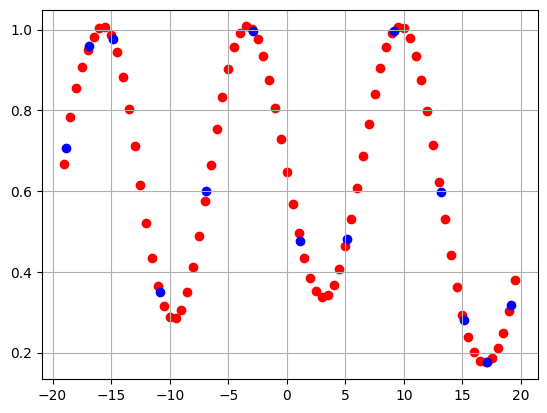

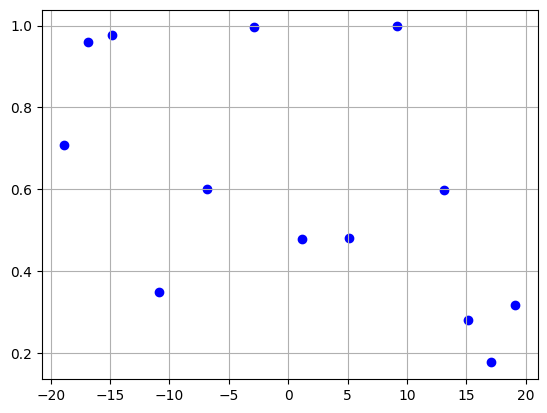

In [9]:
f = open('LogoXn.txt','r')
temp = f.readlines()
f.close
xn = []
for value in temp:
    xn += [float(value.rstrip())]
xn = np.array(xn)

f = open('LogoYn.txt','r')
temp = f.readlines()
f.close
yn = []
for value in temp:
    yn += [float(value.rstrip())]
yn = np.array(yn)


# set the domain of interpolation
x = np.arange(-19.0,20.0,0.5)
y = LagInterp(xn,yn,x)


# plot polynomial in the interpolating range
pl.scatter(x,y,c='Red')
# plot the initial nodal info only
pl.scatter(xn,yn,c='Blue')
pl.grid()
pl.show()

# plot polynomial in the interpolating range
pl.scatter(xn,yn,c='Blue')
pl.grid()
pl.show()




# Task D

In [10]:
# function trapzeqd: compute numerical integration with trapezium rule with equidistant nodes
def trapzeqd(x,y):
    # get the interval h: distance between any two consecutives nodes
    h = x[1] - x[0]
    # get the number of intervals
    N = len(x) - 1  # obviously x and y must have same length
    
    # compute the integral
    
    # compute the sum for the intermediate points
    S = 0.0
    for n in range(1,N):
        S += y[n]  # add the current calue of y
    # add first and last points: see the formula for trapezoidal method
    I = h * (y[0]/2 + S + y[-1]/2 )
    
    # an alternative approach, with slicing and the function np.sum(), the integral can be computed within one line
    I = h * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2 )
    
    return I

In [11]:
# set dimensions (in mm)
H = 150
R = 30

# set discretising steps
dx = 0.05
dy = 0.05
dz = 5

# integrate for every z
# create the z range
zr = np.arange(dz,H+dz,dz)
# determine all the circular sections surfaces
Iz = []
for z in zr:
    # integrate along x
    Rz = 0.2*z
    # define the x range
    xr = np.arange(-Rz+dx,Rz,dx)
    Ix = []
    for x in xr:
        # integrate along y
        # define the y range
        m = np.sqrt(Rz**2-x**2)
        yr = np.arange(-m+dy,m,dy)
        # define the function to be integrated (all ones)
        F = np.ones(len(yr))
        # integrate with trapezium rule along y
        Ix += [trapzeqd(yr,F)]
    Ix = np.array(Ix)
    # integrate with trapezium rule along x
    Iz += [trapzeqd(xr,Ix)]        
# integrate with trapezium rule along x
Iz = np.array(Iz)
I = trapzeqd(zr,Iz)      

print(I)

# double check with analytical formula
I = np.pi*R**2*H/3
print(I)

141076.7187500038
141371.6694115407


In [18]:
# set dimensions (in mm)
H = 150
R = 30

# set discretising steps
dx = 0.05
dy = 0.05

c = R/H
# define the x range
xr = np.arange(-R+dx,R,dx)
Ix = []
for x in xr:
    # integrate along y
    # define the y range
    m = np.sqrt(R**2-x**2)
    yr = np.arange(-m+dy,m,dy)
    # define the function to be integrated (all ones)
    F = ( 2*H - np.sqrt( 4*H**2-4*(H**2-(x**2+yr**2)/c**2) ) )/2
    # integrate with trapezium rule along y
    Ix += [trapzeqd(yr,F)]
Ix = np.array(Ix)
# integrate with trapezium rule along x
I = trapzeqd(xr,Ix)      

print(I)

# double check with analytical formula
I = np.pi*R**2*H/3
print(I)

141371.14063690774
141371.6694115407
